In [1]:
# Priyal
# Dataset -pc1
# without balancing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**

In [3]:
import pandas as pd

# Load pc1 dataset
pc1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/pc1.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(pc1_data.head())



First few rows of the dataset:
     loc   v(g)  ev(g)  iv(G)       N         V     L      D       I  \
0    1.1    1.4    1.4    1.4     1.3      1.30  1.30   1.30    1.30   
1    1.0    1.0    1.0    1.0     1.0      1.00  1.00   1.00    1.00   
2   91.0    9.0    3.0    2.0   318.0   2089.21  0.04  27.68   75.47   
3  109.0   21.0    5.0   18.0   381.0   2547.56  0.04  28.37   89.79   
4  505.0  106.0   41.0   82.0  2339.0  20696.93  0.01  75.93  272.58   

            E  ...  lOCode  lOComment  locCodeAndComment  lOBlank  uniq_Op  \
0        1.30  ...       2          2                  2        2      1.2   
1        1.00  ...       1          1                  1        1      1.0   
2    57833.24  ...      80         44                 11       31     29.0   
3    72282.68  ...      97         41                 12       24     28.0   
4  1571506.88  ...     457         71                 48       49     64.0   

   uniq_Opnd  total_Op  total_Opnd  branchCount  defects  
0       

In [4]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(pc1_data.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                1109 non-null   float64
 1   v(g)               1109 non-null   float64
 2   ev(g)              1109 non-null   float64
 3   iv(G)              1109 non-null   float64
 4   N                  1109 non-null   float64
 5   V                  1109 non-null   float64
 6   L                  1109 non-null   float64
 7   D                  1109 non-null   float64
 8   I                  1109 non-null   float64
 9   E                  1109 non-null   float64
 10  B                  1109 non-null   float64
 11  T                  1109 non-null   float64
 12  lOCode             1109 non-null   int64  
 13  lOComment          1109 non-null   int64  
 14  locCodeAndComment  1109 non-null   int64  
 15  lOBlank            1109 non-null   int64

In [5]:
# Summary statistics of numerical attributes
print("\nSummary statistics of numerical attributes:")
print(pc1_data.describe())



Summary statistics of numerical attributes:
               loc         v(g)        ev(g)        iv(G)            N  \
count  1109.000000  1109.000000  1109.000000  1109.000000  1109.000000   
mean     23.376105     5.510730     2.766817     3.321371   117.393417   
std      35.284017     8.958976     5.567704     6.401998   197.336888   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       7.000000     1.000000     1.000000     1.000000    25.000000   
50%      13.000000     3.000000     1.000000     2.000000    58.000000   
75%      26.000000     6.000000     3.000000     3.000000   126.000000   
max     602.000000   136.000000   123.000000   123.000000  2785.000000   

                  V            L            D            I             E  ...  \
count   1109.000000  1109.000000  1109.000000  1109.000000  1.109000e+03  ...   
mean     699.711217     0.129414    15.396267    32.904472  2.882288e+04  ...   
std     1509.545684     0.146952    16.337508

In [6]:
# Class distribution
print("\nClass distribution:")
print(pc1_data['defects'].value_counts())



Class distribution:
False    1032
True       77
Name: defects, dtype: int64


In [7]:
# Missing values
print("\nMissing values:")
print(pc1_data.isnull().sum())


Missing values:
loc                  0
v(g)                 0
ev(g)                0
iv(G)                0
N                    0
V                    0
L                    0
D                    0
I                    0
E                    0
B                    0
T                    0
lOCode               0
lOComment            0
locCodeAndComment    0
lOBlank              0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


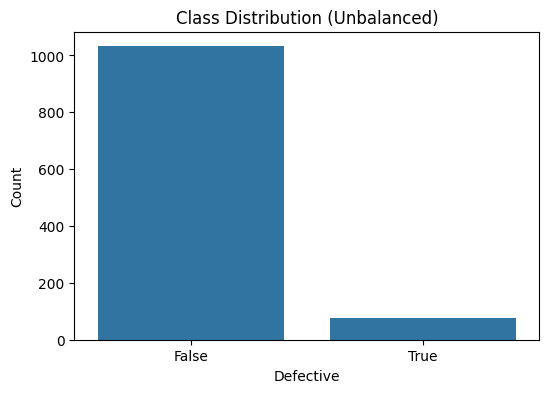

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=pc1_data, x='defects')
plt.title('Class Distribution (Unbalanced)')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()




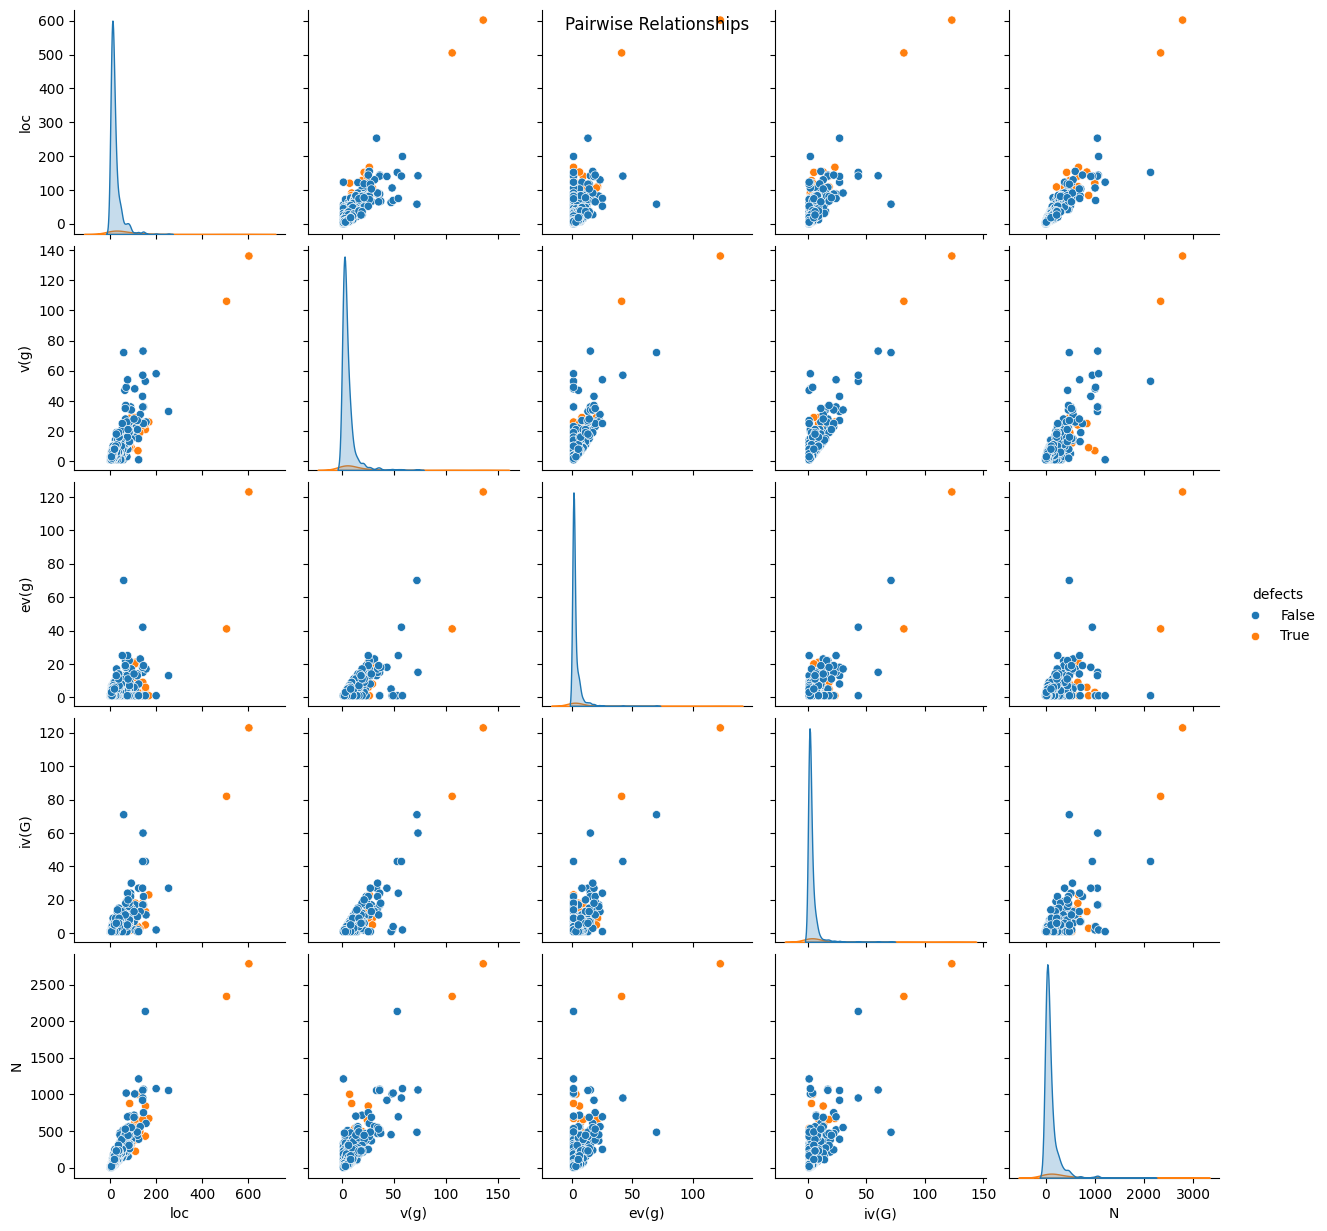

In [9]:
# Pairwise Relationships
sns.pairplot(pc1_data[['loc', 'v(g)', 'ev(g)', 'iv(G)','N', 'defects']], hue='defects')
plt.suptitle('Pairwise Relationships')
plt.show()



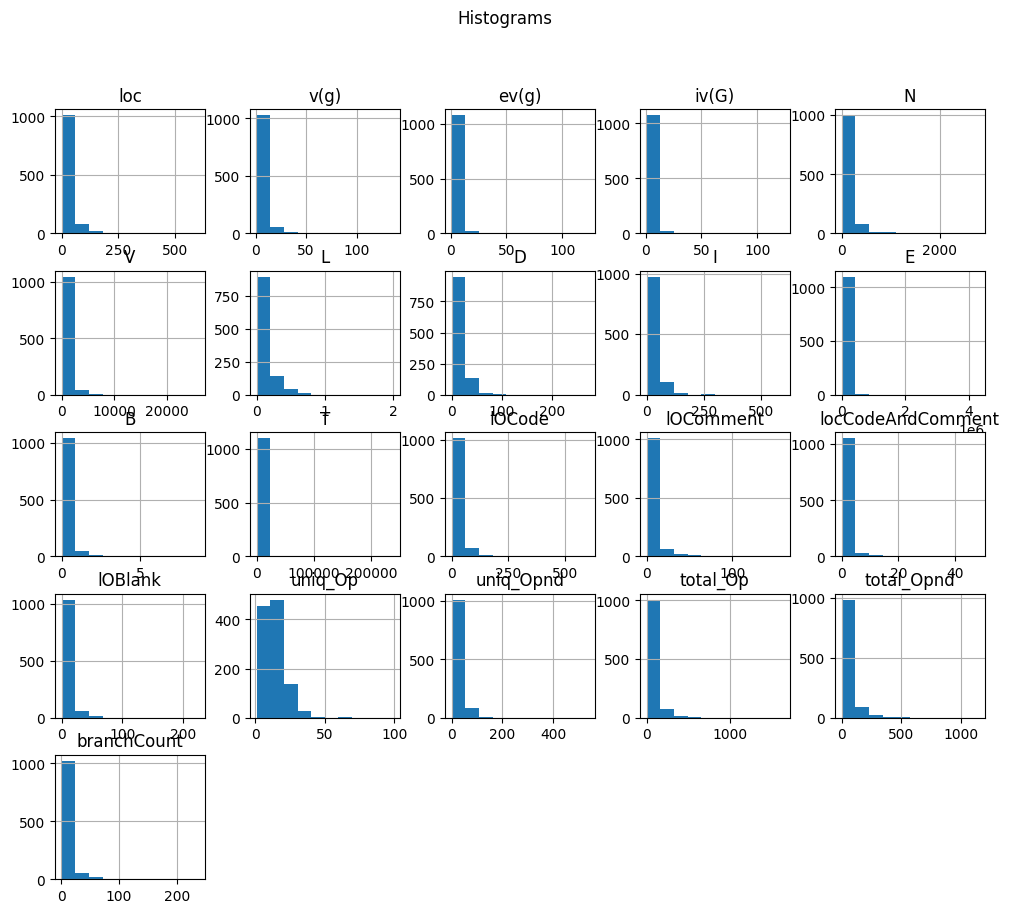

In [10]:

# Histograms
pc1_data.hist(figsize=(12, 10))
plt.suptitle('Histograms')
plt.show()


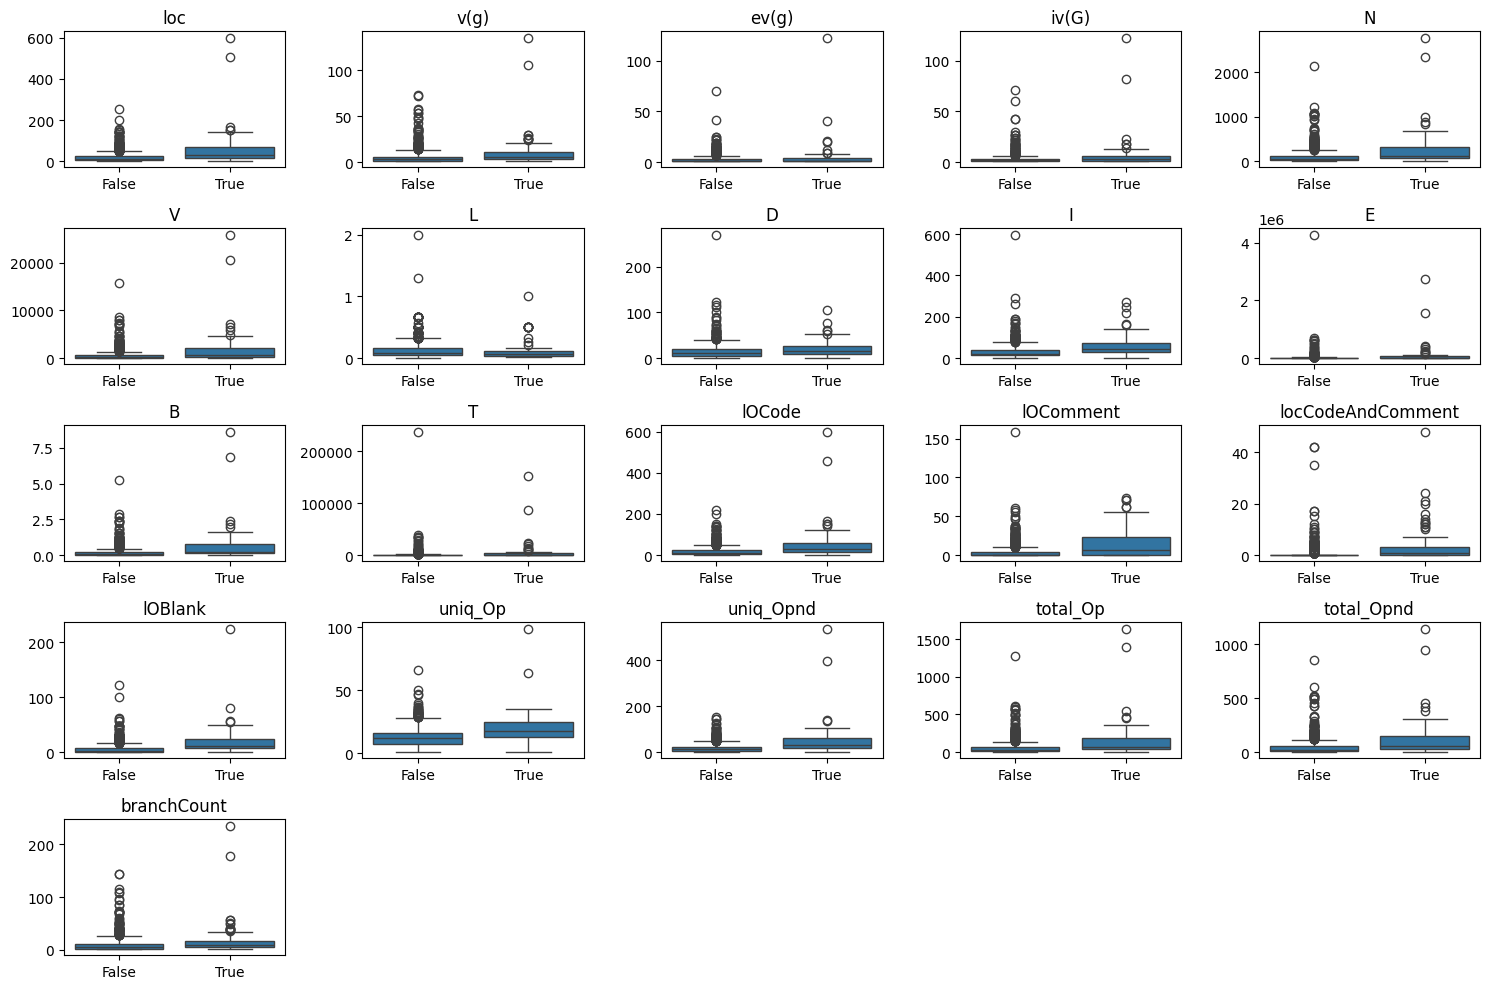

In [11]:
# Visualize box plots for all attributes
plt.figure(figsize=(15, 10))
for i, column in enumerate(pc1_data.columns[:-1]):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='defects', y=column, data=pc1_data)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# **Random Forest Classifier**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Preprocess data
X = pc1_data.drop(columns=["defects"])
y = pc1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier on the original unbalanced dataset
rf_classifier_original = RandomForestClassifier(random_state=42)
rf_classifier_original.fit(X_train, y_train)

# Predict on the test set
y_pred_original = rf_classifier_original.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_original)
print("Random Classifier Accuracy on original unbalanced data:", accuracy_rf)

# Calculate precision
precision_rf = precision_score(y_test, y_pred_original,average='weighted')

# Calculate recall
recall_rf = recall_score(y_test, y_pred_original,average='weighted')

# Print precision and recall
print("Precision:", precision_rf)
print("Recall:", recall_rf)

# Generate classification report
classification_report_rf = classification_report(y_test, y_pred_original)
print("\nClassification Report:\n", classification_report_rf)


Random Classifier Accuracy on original unbalanced data: 0.9144144144144144
Precision: 0.885899661129019
Recall: 0.9144144144144144

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.99      0.95       203
        True       0.50      0.11      0.17        19

    accuracy                           0.91       222
   macro avg       0.71      0.55      0.56       222
weighted avg       0.89      0.91      0.89       222



# **K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Accuracy without balancing: 0.9305680793507665
Precision: 0.9013968002619611
Recall: 0.9305680793507665


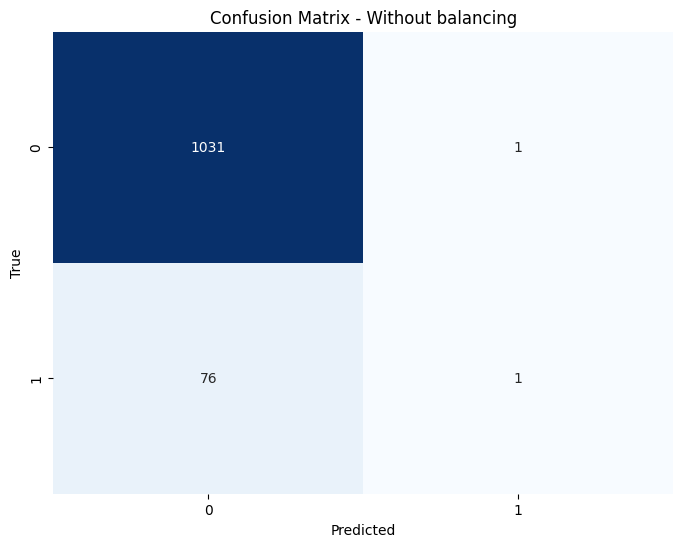

Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1032
        True       0.50      0.01      0.03        77

    accuracy                           0.93      1109
   macro avg       0.72      0.51      0.49      1109
weighted avg       0.90      0.93      0.90      1109



In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Separate features and target variable
X_original = pc1_data.drop(columns=["defects"])
y_original = pc1_data["defects"]

# Train KMeans model
kmeans_original = KMeans(n_clusters=2, random_state=42)
kmeans_original.fit(X_original)

# Predict clusters
y_pred_original = kmeans_original.labels_

# Calculate accuracy
accuracy_kmeans = accuracy_score(y_original, y_pred_original)
print("K-means Accuracy without balancing:", accuracy_kmeans)

# Calculate precision
precision_kmeans = precision_score(y_original, y_pred_original, average='weighted')

# Calculate recall
recall_kmeans = recall_score(y_original, y_pred_original, average='weighted')

# Print precision and recall
print("Precision:", precision_kmeans)
print("Recall:", recall_kmeans)


# Create confusion matrix
cm_original = confusion_matrix(y_original, y_pred_original)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Without balancing")
plt.show()

# Generate classification report
print("Classification Report:")
print(classification_report(y_original, y_pred_original))


# **SVM**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


# Split the data into features and target variable
X = pc1_data.drop(columns=["defects"])
y = pc1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM on the unbalanced dataset
svm_unbalanced = SVC(kernel='linear')
svm_unbalanced.fit(X_train, y_train)

# Predict on the test set
y_pred_unbalanced = svm_unbalanced.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_unbalanced)
print("SVM Accuracy on unbalanced data:", accuracy_svm)

# Calculate precision
precision_svm = precision_score(y_test, y_pred_unbalanced, average='weighted')
print("SVM Precision:", precision_svm)

# Calculate recall
recall_svm = recall_score(y_test, y_pred_unbalanced,average='weighted')
print("SVM Recall:", recall_svm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_unbalanced))


SVM Accuracy on unbalanced data: 0.8873873873873874
SVM Precision: 0.8481992506525217
SVM Recall: 0.8873873873873874
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94       203
        True       0.12      0.05      0.07        19

    accuracy                           0.89       222
   macro avg       0.52      0.51      0.51       222
weighted avg       0.85      0.89      0.87       222



# **Logistic Regression**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Split the data into features and target variable
X = pc1_data.drop(columns=["defects"])
y = pc1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression on the unbalanced dataset
lr_unbalanced = LogisticRegression(random_state=42)
lr_unbalanced.fit(X_train, y_train)

# Predict on the test set
y_pred_unbalanced = lr_unbalanced.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_unbalanced)
print("Logistic Regression Accuracy on unbalanced data:", accuracy_lr)

# Calculate precision
precision_lr = precision_score(y_test, y_pred_unbalanced, average='weighted')
print("Logistic Regression Precision:", precision_lr)

# Calculate recall
recall_lr = recall_score(y_test, y_pred_unbalanced, average='weighted')
print("Logistic Regression Recall:", recall_lr)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_unbalanced))


Logistic Regression Accuracy on unbalanced data: 0.9099099099099099
Logistic Regression Precision: 0.877012496367335
Logistic Regression Recall: 0.9099099099099099
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.99      0.95       203
        True       0.40      0.11      0.17        19

    accuracy                           0.91       222
   macro avg       0.66      0.55      0.56       222
weighted avg       0.88      0.91      0.89       222



# **Decision Trees**

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Split the data into features and target variable
X = pc1_data.drop(columns=["defects"])
y = pc1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree on the unbalanced dataset
dt_unbalanced = DecisionTreeClassifier(random_state=42)
dt_unbalanced.fit(X_train, y_train)

# Predict on the test set
y_pred_unbalanced = dt_unbalanced.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_unbalanced,)
print("Decision Trees Accuracy on unbalanced data:", accuracy_dt)

# Calculate precision and recall
precision_dt = precision_score(y_test, y_pred_unbalanced,average='weighted')
recall_dt = recall_score(y_test, y_pred_unbalanced,average='weighted')

print("Precision:", precision_dt)
print("Recall:", recall_dt)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_unbalanced))


Decision Trees Accuracy on unbalanced data: 0.8918918918918919
Precision: 0.8684164560941812
Recall: 0.8918918918918919

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       203
        True       0.27      0.16      0.20        19

    accuracy                           0.89       222
   macro avg       0.60      0.56      0.57       222
weighted avg       0.87      0.89      0.88       222



# **Gradient Boosing**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


# Split the data into features and target variable
X = pc1_data.drop(columns=["defects"])
y = pc1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting on the unbalanced dataset
gb_unbalanced = GradientBoostingClassifier(random_state=42)
gb_unbalanced.fit(X_train, y_train)

# Predict on the test set
y_pred_unbalanced = gb_unbalanced.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_unbalanced)
print("Gradient Boosting Accuracy on unbalanced data:", accuracy_gb)

# Calculate precision
precision_gb = precision_score(y_test, y_pred_unbalanced,average='weighted')
print("Gradient Boosting Precision:", precision_gb)

# Calculate recall
recall_gb = recall_score(y_test, y_pred_unbalanced,average='weighted')
print("Gradient Boosting Recall:", recall_gb)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_unbalanced))


Gradient Boosting Accuracy on unbalanced data: 0.9144144144144144
Gradient Boosting Precision: 0.8894728061394728
Gradient Boosting Recall: 0.9144144144144144
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.99      0.95       203
        True       0.50      0.16      0.24        19

    accuracy                           0.91       222
   macro avg       0.71      0.57      0.60       222
weighted avg       0.89      0.91      0.89       222



# **Comparison Between models**

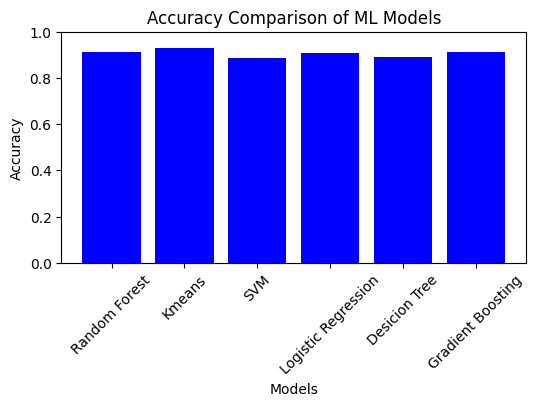

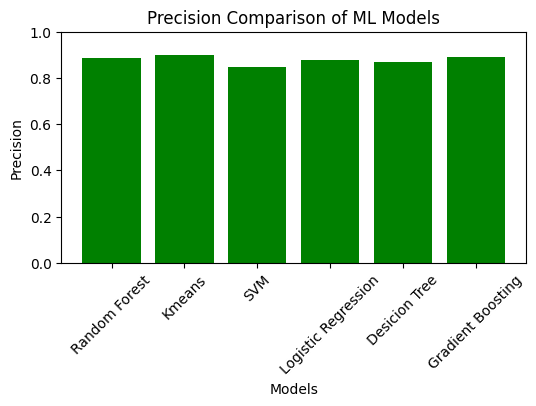

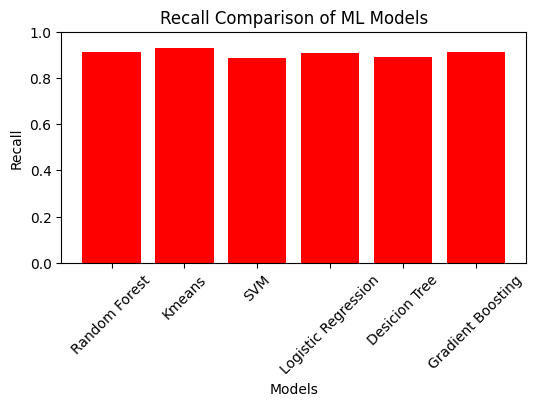

In [18]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='green')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting recall
plt.figure(figsize=(6, 3))
plt.bar(models, recalls, color='red')
plt.title('Recall Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

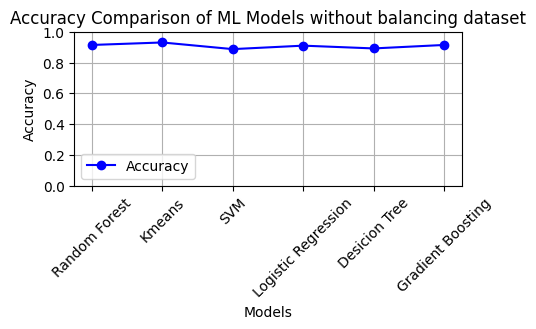

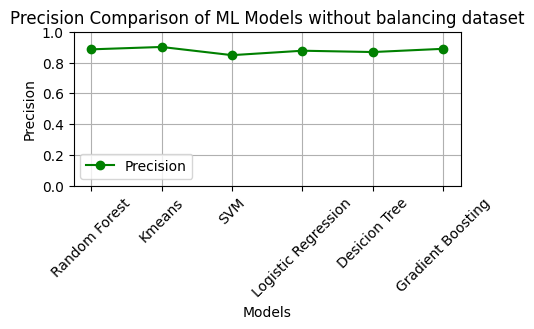

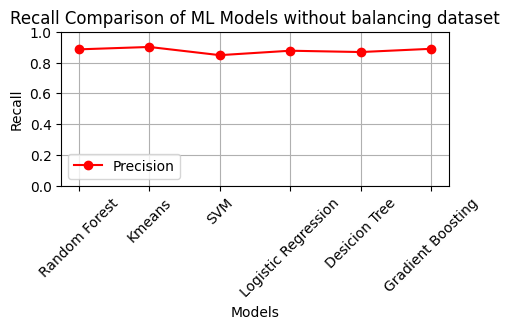

In [19]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models without balancing dataset')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models without balancing dataset')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting recall
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='red', label='Precision')
plt.title('Recall Comparison of ML Models without balancing dataset')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()